<a href="https://colab.research.google.com/github/GokulGopinath/Deep-Learning-/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib mnist keras

# Import

In [3]:
import numpy as np
import tensorflow as tf
import mnist #dataset
from keras.models import Sequential #for NN architecture
from keras.layers import Dense##for layer
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load DataSet

In [0]:
train_images=mnist.train_images()
train_labels=mnist.train_labels()
test_images=mnist.test_images()
test_labels=mnist.test_labels()

In [5]:
train_images.shape

(60000, 28, 28)

So we have 60000 28 x 28 grayscale images

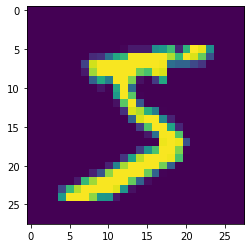

In [6]:
plt.imshow(train_images[0])

# Normalize dataset

The image has 28*28 pixels with pixel values from 0-255. Now we bring it to range [-0.5,0.5]

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_n_images=train_images/255#this will bring pixel valu range to [0,1]
train_n_images=train_n_images-0.5#pixel values in range [-0.5,0.5]
train_n_images[0] 

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5   

In [9]:
test_n_images=test_images/255#this will bring pixel value in range to [0,1]
test_n_images=test_n_images-0.5#pixel values in range [-0.5,0.5]
test_n_images[0] 

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5   

# Flatten the images

Flatten 28x28 image to 784 dimension vector

In [10]:
train_n_images=train_n_images.reshape((-1,784))
test_n_images=test_n_images.reshape((-1,784))
print(train_n_images.shape,test_n_images.shape)

(60000, 784) (10000, 784)


# ?? [Fn code You want to see]

In [0]:
??Sequential

# Build model

Build a model with 3 layer
2 layers:64 neurons and relu fn
1 layer(O/p layer):10 neurons for o/p 0-9 and softmax fn

In [12]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy', #as we have many classes
              metrics=['accuracy']
              )

# to_categorical

In [14]:
train_labels[0]

5

In [15]:
to_categorical(train_labels[0])

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
to_categorical(8)

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

to_categorical converts a no. into a vector of numbers of 0 and 1 .1 for the no. it actually is and rest all 0.

# Train

In [19]:
model.fit(
    train_n_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=32 # no. of samples per gradient update
)

Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.0937 - accuracy: 0.9700
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0833 - accuracy: 0.9735
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0773 - accuracy: 0.9750
Epoch 4/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0718 - accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0676 - accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0638 - accuracy: 0.9793
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0603 - accuracy: 0.9804
Epoch 8/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0561 - accuracy: 0.9814
Epoch 9/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0534 - accuracy: 0.9823
Epoch 10/10
60000/60000 [==============================

In [20]:
model.fit(
    train_n_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=32 # no. of samples per gradient update
)

Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0493 - accuracy: 0.9838
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0452 - accuracy: 0.9851
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0437 - accuracy: 0.9854
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0424 - accuracy: 0.9858
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0409 - accuracy: 0.9864
Epoch 6/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0372 - accuracy: 0.9874
Epoch 7/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0352 - accuracy: 0.9877
Epoch 8/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0360 - accuracy: 0.9879
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0356 - accuracy: 0.9875
Epoch 10/10
60000/60000 [==============================

In [21]:
model.fit(
    train_n_images,
    to_categorical(train_labels),
    epochs=10,
    batch_size=32 # no. of samples per gradient update
)

Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0310 - accuracy: 0.9898
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0311 - accuracy: 0.9890
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0301 - accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0282 - accuracy: 0.9901
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0281 - accuracy: 0.9905
Epoch 6/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0272 - accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0272 - accuracy: 0.9908
Epoch 8/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.0268 - accuracy: 0.9908
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0273 - accuracy: 0.9907
Epoch 10/10
60000/60000 [==============================

So here we got 99.08% accuracy,and loss 0.0271

# Evaluate

In [22]:
model.evaluate(
    test_n_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 52us/step


[0.13788925925763973, 0.9724000096321106]

Here we got 97.24% accuracy and loss of 0.137

# save our model

In [0]:
model.save_weights('/content/drive/My Drive/weights/Mnist_weights.h5')

# Predictions

Lets predict on first 5 test images 

In [25]:
predictions=model.predict(test_n_images[0:5])
print(predictions)

[[7.1283444e-11 5.9659191e-17 1.7190382e-08 1.6856305e-09 1.6684949e-13
  4.1542079e-15 2.5387611e-20 1.0000000e+00 1.4284240e-10 1.7349480e-08]
 [4.0604554e-14 6.1288892e-14 1.0000000e+00 1.8343288e-10 1.8577284e-22
  9.3687894e-13 1.2445938e-11 6.0858585e-14 1.2681072e-16 2.6320137e-25]
 [1.9362664e-10 9.9989903e-01 3.9675976e-07 4.5775234e-08 2.2572381e-08
  5.7364133e-07 1.3821684e-09 9.9196717e-05 7.0588834e-07 9.7267860e-11]
 [9.9999964e-01 2.8975082e-28 3.4281123e-07 2.0230348e-19 8.7036032e-09
  3.3684277e-16 4.8280889e-12 2.2192559e-08 2.8701227e-16 3.4392634e-12]
 [9.0312076e-19 1.9038945e-17 1.9761912e-13 1.9075651e-18 9.9997795e-01
  6.5750420e-18 8.7687683e-16 2.8407534e-09 2.3134450e-16 2.2044876e-05]]


See each predictions have 10 probability values for each class

In [26]:
predictions[0]

array([7.1283444e-11, 5.9659191e-17, 1.7190382e-08, 1.6856305e-09,
       1.6684949e-13, 4.1542079e-15, 2.5387611e-20, 1.0000000e+00,
       1.4284240e-10, 1.7349480e-08], dtype=float32)

So here we have to select the class with highest probability

In [29]:
print(np.argmax(predictions,axis=1)) #our predictions
prediction=np.argmax(predictions,axis=1)
print(test_labels[0:5])

[7 2 1 0 4]
[7 2 1 0 4]


So see our predictons are right

See the images of predictions

prediction: 7


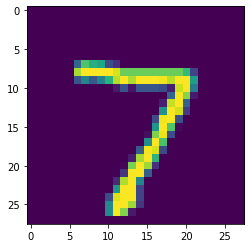

prediction: 2


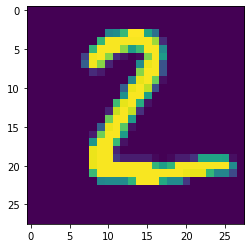

prediction: 1


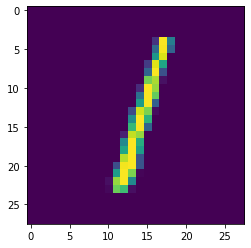

prediction: 0


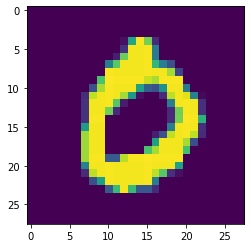

prediction: 4


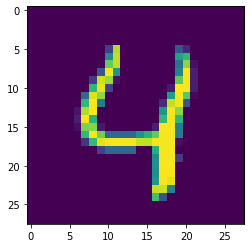

In [31]:
for i in range(5):
  print("prediction:",prediction[i])
  plt.imshow(test_images[i])
  plt.show()

prediction: 7


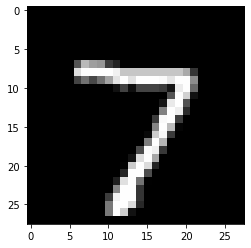

prediction: 2


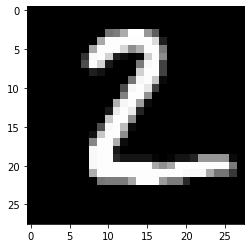

prediction: 1


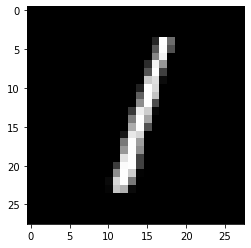

prediction: 0


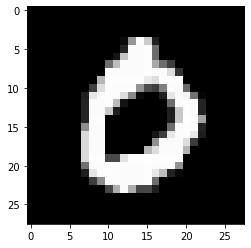

prediction: 4


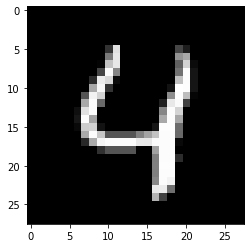

In [32]:
for i in range(5):
  print("prediction:",prediction[i])
  plt.imshow(test_images[i],cmap='gray') # to see the images in gray
  plt.show()